In [10]:
import plotnine
import os
import pandas as pd
from plotnine import *
import numpy as np
pathresults = "../results/"
hW95 = "dx0010plant25k_9.5_30mn_0s_121_100/" #"dx_2000plant100k_9.5_30mn_0s_7_500/" 
lW95B ="dx0010plant25k_9.5_10mn_0s_7_1000/"# "dx_2000plant100k_9.5_30mn_0s_7_1000/" 
lW95BB = "dx_2000plant100k_9.5_30mn_0s_7_5000/" 
#lW95BB = "NoSkip00plant100k_9.5_0mn_1s_7_5000/" 
lW95C = "dx_2000plant100k_9.5_1mn_0s_7_14500/" 
#lW95CC = "11plant100k_9.5_0mn_1s_7_5000/" 
data_file_delimiter = ","

In [11]:

def getVal(mypath, filename, header="infer",names = None):
    fullpath = pathresults +mypath+filename
    if names is None:
        cst = pd.read_csv(fullpath,delimiter=data_file_delimiter, header = header)
    else:
        cst = pd.read_csv(fullpath,delimiter=data_file_delimiter, header = header, names = names)
    return cst
 
def getValAll(mypath, useIter = True):
    if useIter:
        err = getVal(mypath,"fpit_error.csv" )#fpit_error
    else:
        err = getVal(mypath,"error.csv" )
        
    colN = list(["\u0394\u03C8x", "\u0394Vw_1DS", "\u0394Vw_3DS", 
                    "delete_SinkLim3DS","delete_SinkLim1DS","delete_maxDiff_Vw_1DS_3DS", 
           "\u0394\u03C8rsi", "delete_maxDiff1d3dCW_absBU", 
                    "Err_Vw_3DS","delete_bulkMassErrorWater_absLim",
                    "delete_rhizoMassWError_absLim","Err_Vw_1DSabs",
                    "\u0394_BCin_1DS", "\u0394_BCout_1DS","\u0394Q_3DS",
                    "delete_diff1d3dCurrant","Err_Vw_1DSrel",'delete_err'])
    err.set_axis(colN, axis="columns", inplace=True)
    err = err.drop(columns=["delete_SinkLim3DS","delete_SinkLim1DS", "delete_maxDiff1d3dCW_absBU", 
                    "delete_bulkMassErrorWater_absLim","delete_maxDiff_Vw_1DS_3DS",
                    "delete_rhizoMassWError_absLim",
                    "delete_diff1d3dCurrant",'delete_err'])
    
    
        
    if not useIter:
        tt = getVal(mypath, "time.txt")
        err['time'] = tt.iloc[:,0]
        
        headername = np.array(["V"+str(i) for i in range(18)])
        se1d3d = getVal(mypath,"sumErrors1ds3ds.txt" , header =None, names = headername )
        # se1d3d = se1d3d.iloc[:,[0,9]]
        err["sumDVw_1D3Dabs"] = se1d3d.iloc[:,0]
        err["sumDVw_1D3Drel"] = se1d3d.iloc[:,9]
        err = pd.melt(err, id_vars=['time'])
    else:
        err['n_loop'] = np.array([i for i in range(len(err.iloc[:,0]))])
        err = pd.melt(err, id_vars=['n_loop'])
    return(err)   

/home/m.giraud/.conda/envs/py38b/lib/python3.8/site-packages/plotnine/facets/facet.py:446: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'
/home/m.giraud/.conda/envs/py38b/lib/python3.8/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 1 rows containing missing values.


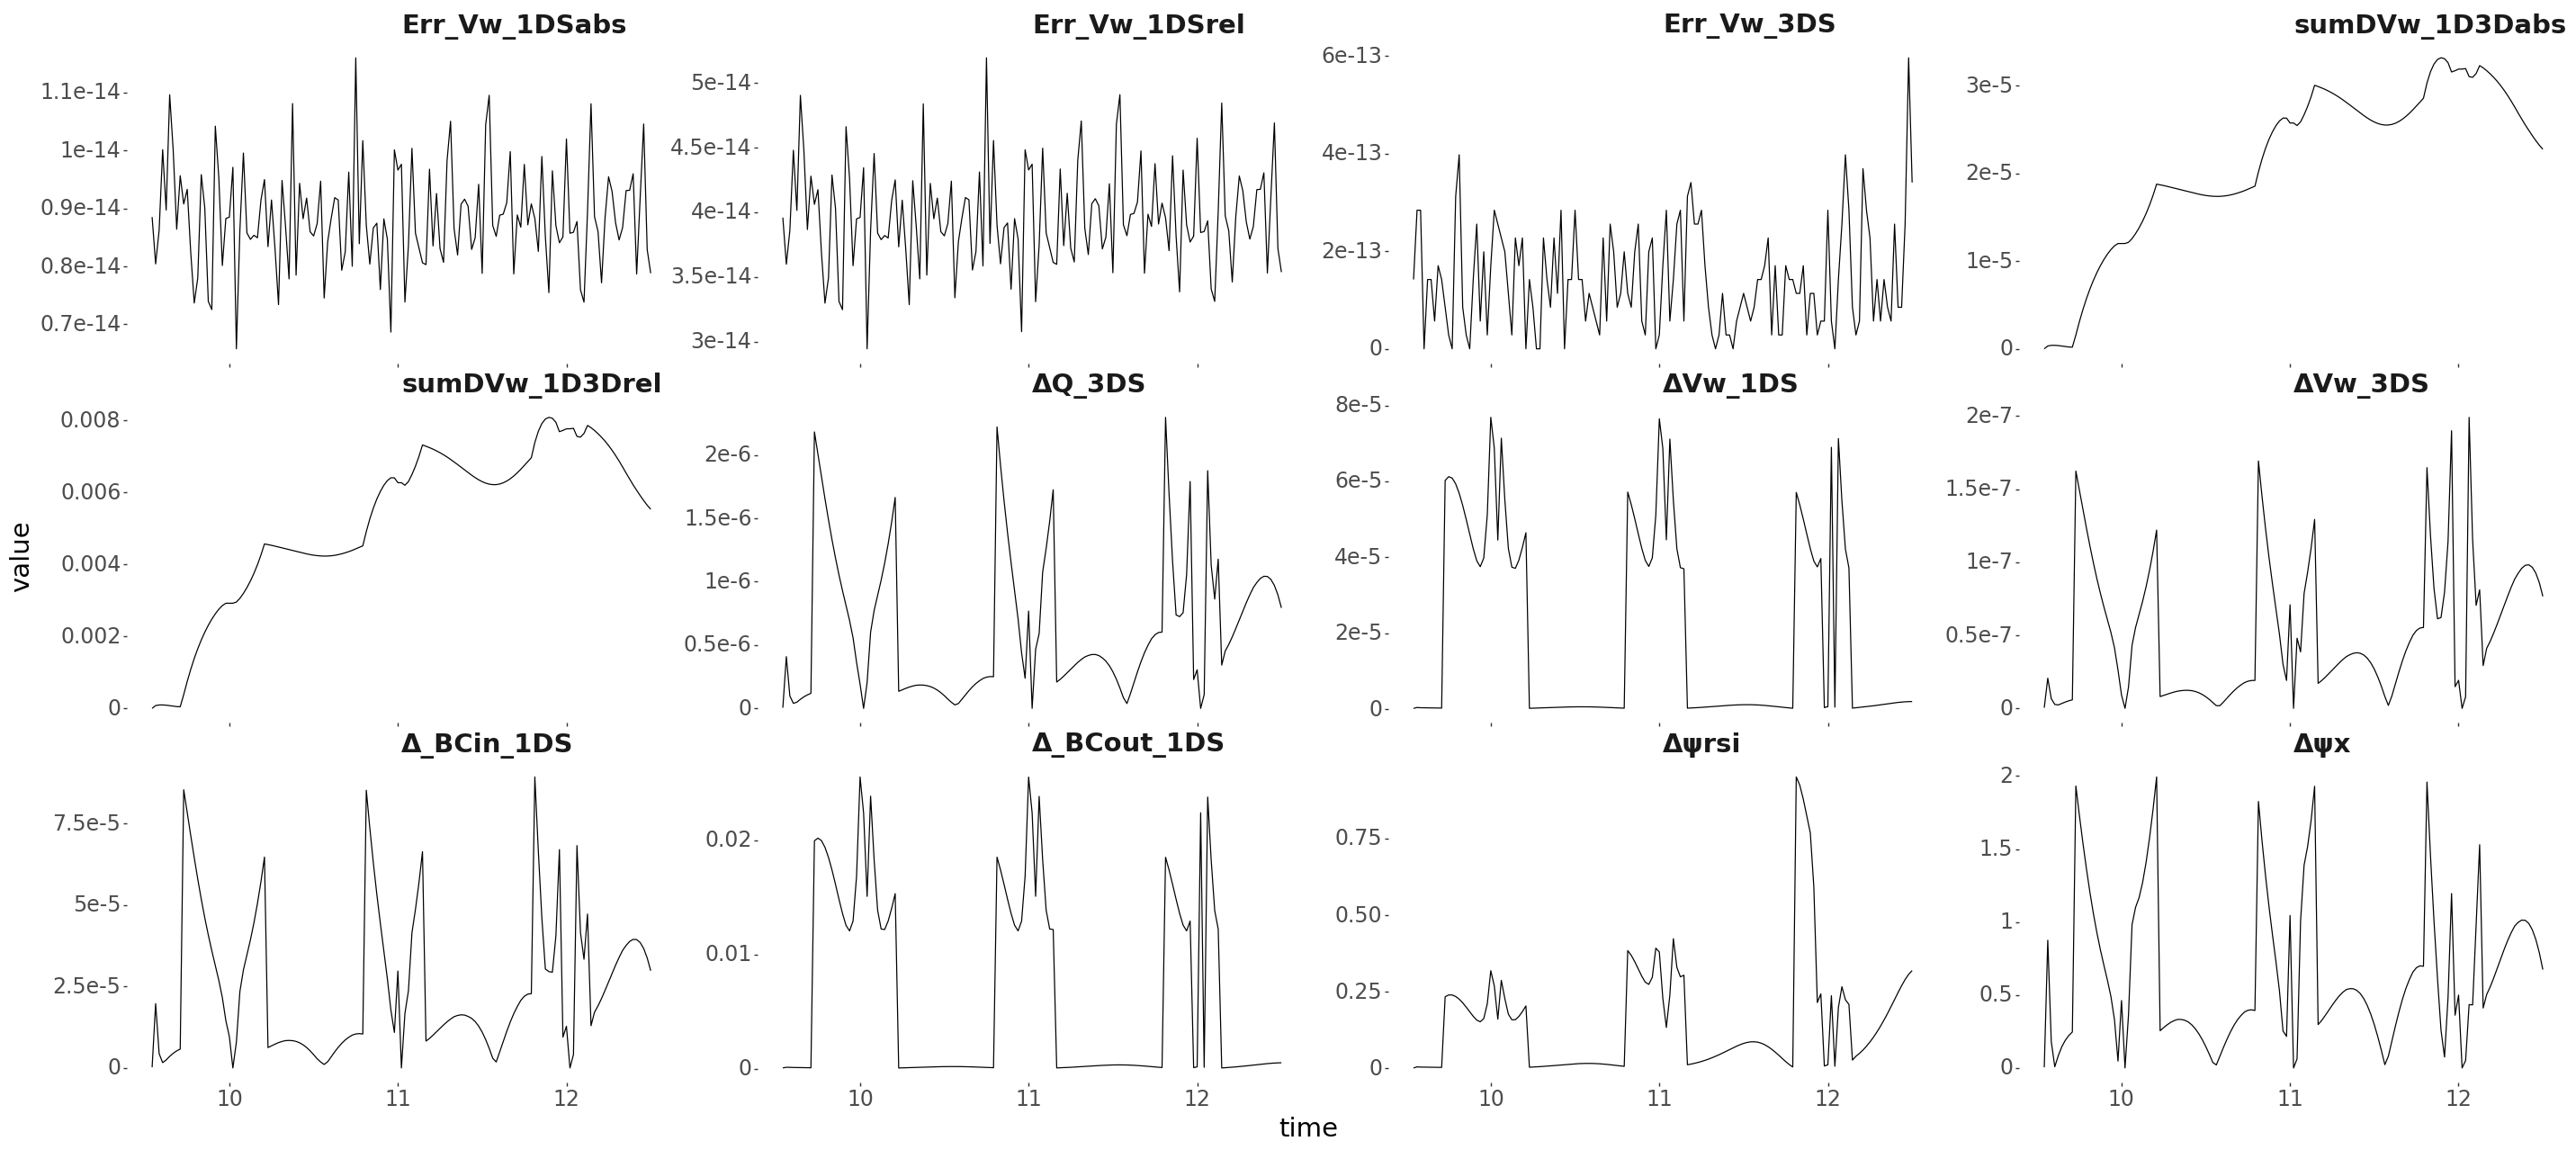

In [12]:
useIter = False

dfs = getValAll(hW95, useIter)

if useIter:
    x_val = 'n_loop'
else:
    x_val = 'time'

from plotnine import options
options.figure_size = (35, 15)
fig, plot= (
   ggplot(data=dfs)
    +aes(x=x_val, y='value',col ='variable')+
  xlab(x_val)+
  geom_line()+
  #ylab("s_st (mmol/ml)")+#bquote(s[st]~" (mmol/ml)"))+ 
  facet_wrap("variable",scales = "free")+
  theme(legend_text = element_text( size=15),
        legend_title = element_text( size=15),
        legend_position="none",#c(0.5,0.1),
        legend_direction = "horizontal",
        #legend_box = "vertical",
        panel_grid_minor = element_line(colour="white"),
        panel_grid_major = element_line(colour="white"),
        panel_background = element_rect(fill="white", color="black"),
        strip_text_y =element_text( size=15) ,
        axis_text = element_text( size=17),
        axis_title = element_text( size=21),
        strip_background = element_rect(fill="white"),
        strip_text = element_text(size = 21, hjust = 0,face ="bold"),
        subplots_adjust={'wspace':0.15}
        #strip_placement = "inside"
       )
).draw(show=True, return_ggplot=True)
fig.savefig('hW95_30mn.png', dpi=300)

/home/m.giraud/.conda/envs/py38b/lib/python3.8/site-packages/plotnine/facets/facet.py:446: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'
/home/m.giraud/.conda/envs/py38b/lib/python3.8/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 1 rows containing missing values.


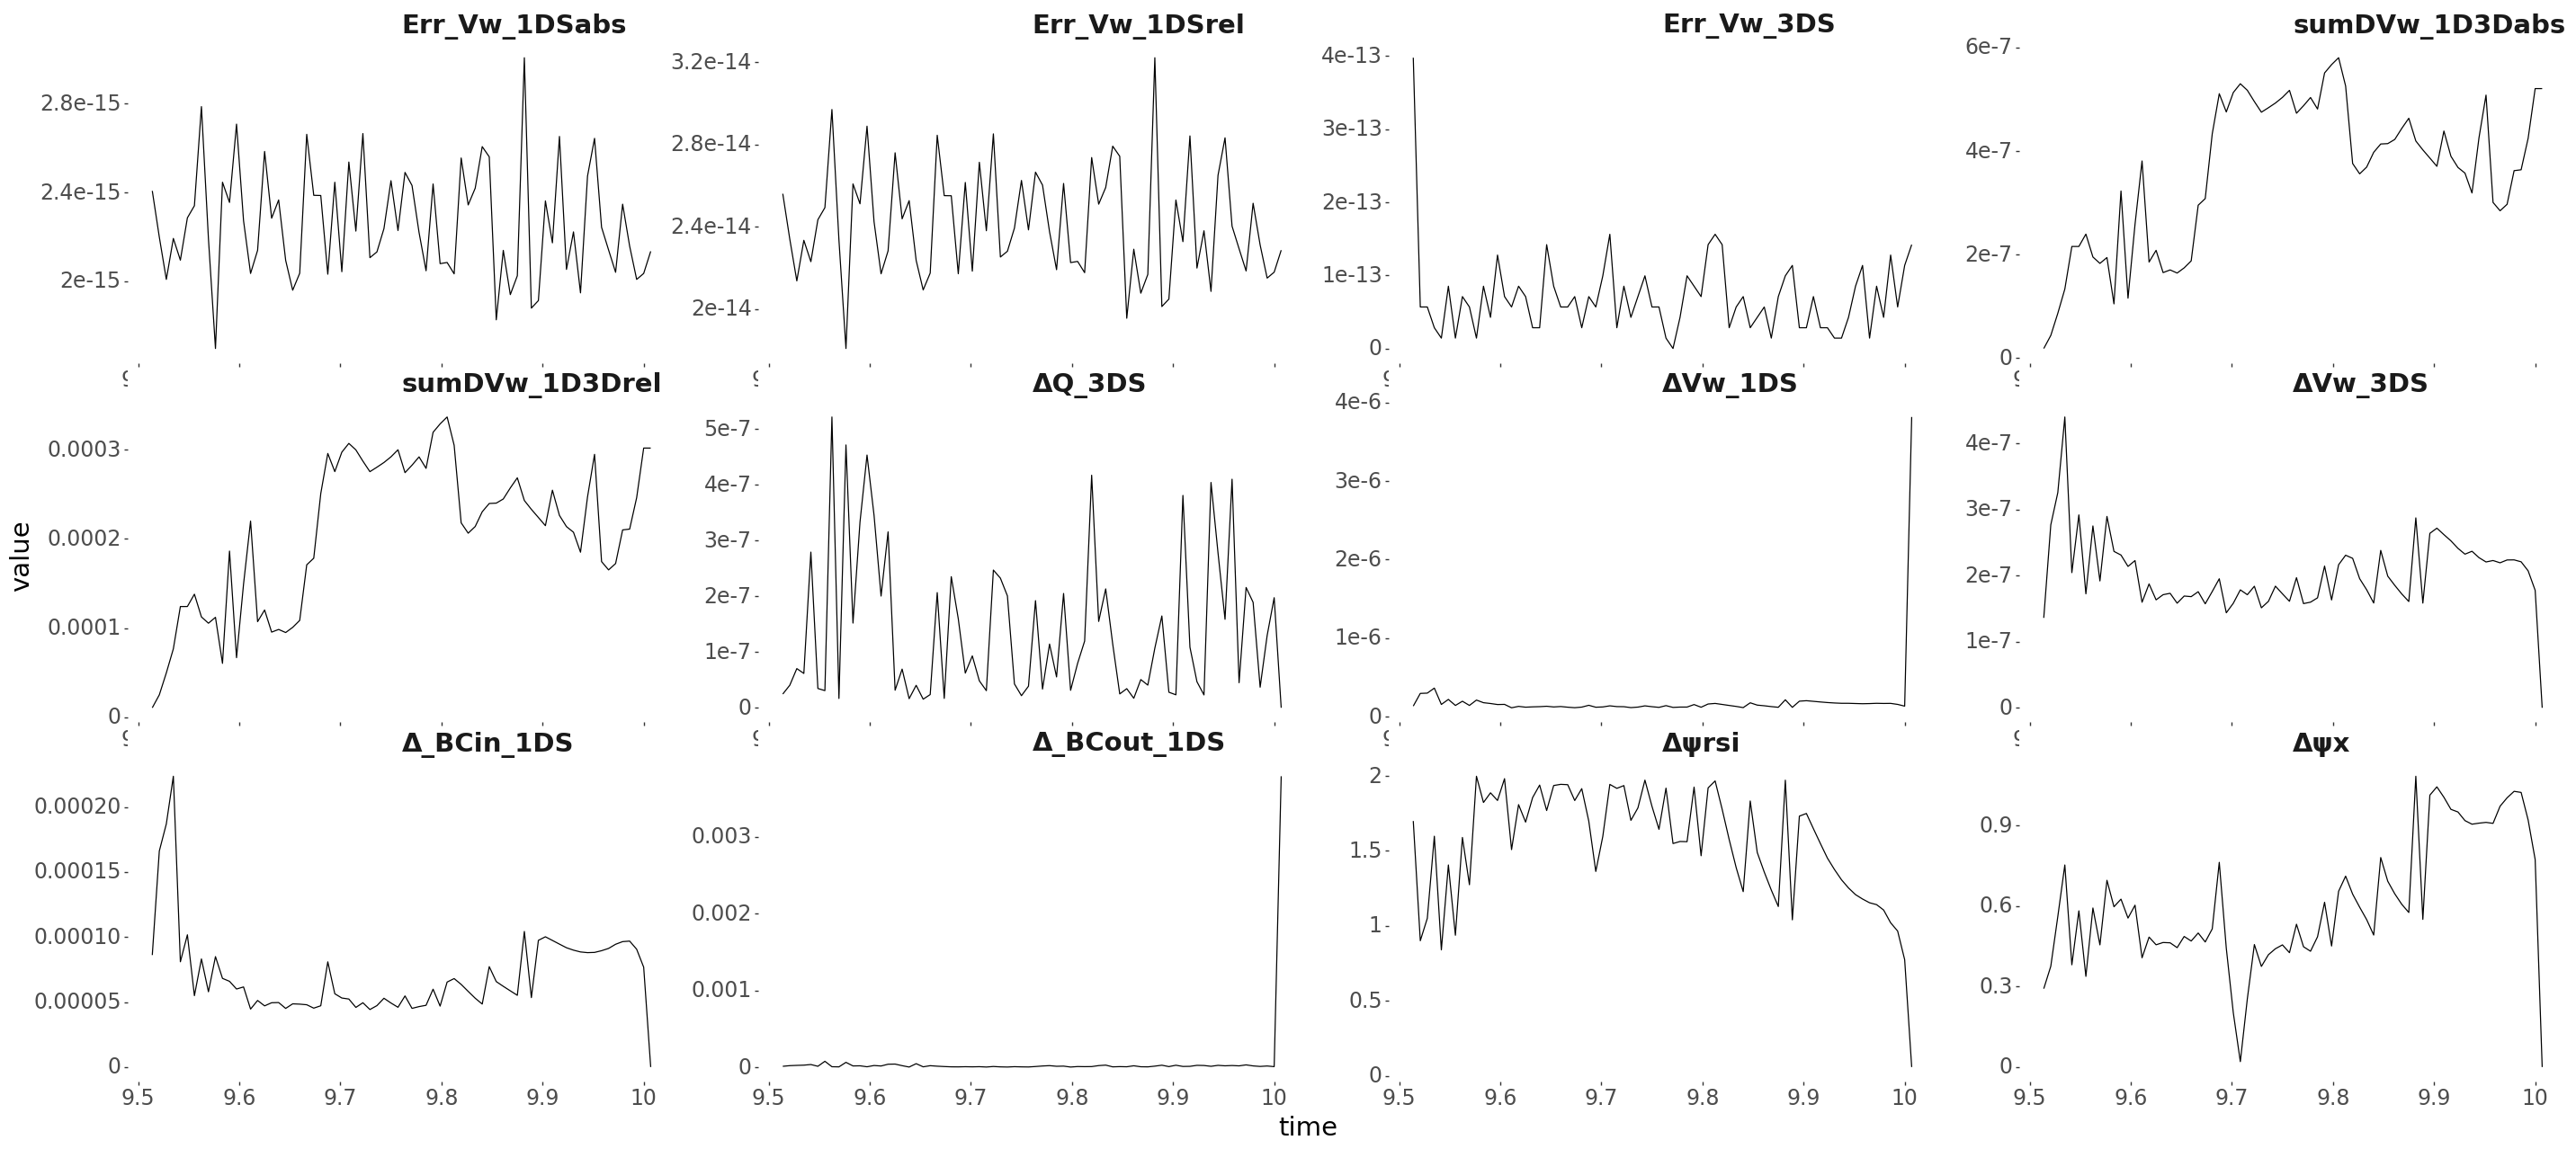

In [14]:
useIter = False

dfs = getValAll(lW95B, useIter)

if useIter:
    x_val = 'n_loop'
else:
    x_val = 'time'

from plotnine import options
options.figure_size = (35, 15)
fig, plot=(
    ggplot(data=dfs)
    +aes(x=x_val, y='value',col ='variable')+
  xlab(x_val)+
  geom_line()+
  #ylab("s_st (mmol/ml)")+#bquote(s[st]~" (mmol/ml)"))+ 
  facet_wrap("variable",scales = "free")+
  theme(legend_text = element_text( size=15),
        legend_title = element_text( size=15),
        legend_position="none",#c(0.5,0.1),
        legend_direction = "horizontal",
        #legend_box = "vertical",
        panel_grid_minor = element_line(colour="white"),
        panel_grid_major = element_line(colour="white"),
        panel_background = element_rect(fill="white", color="black"),
        strip_text_y =element_text( size=15) ,
        axis_text = element_text( size=17),
        axis_title = element_text( size=21),
        strip_background = element_rect(fill="white"),
        strip_text = element_text(size = 21, hjust = 0,face ="bold"),
        subplots_adjust={'wspace':0.15}
        #strip_placement = "inside"
       )
).draw(show=True, return_ggplot=True)
fig.savefig('lW95_10mn.png', dpi=300)

/home/m.giraud/.conda/envs/py38b/lib/python3.8/site-packages/plotnine/facets/facet.py:446: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'
/home/m.giraud/.conda/envs/py38b/lib/python3.8/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 1 rows containing missing values.


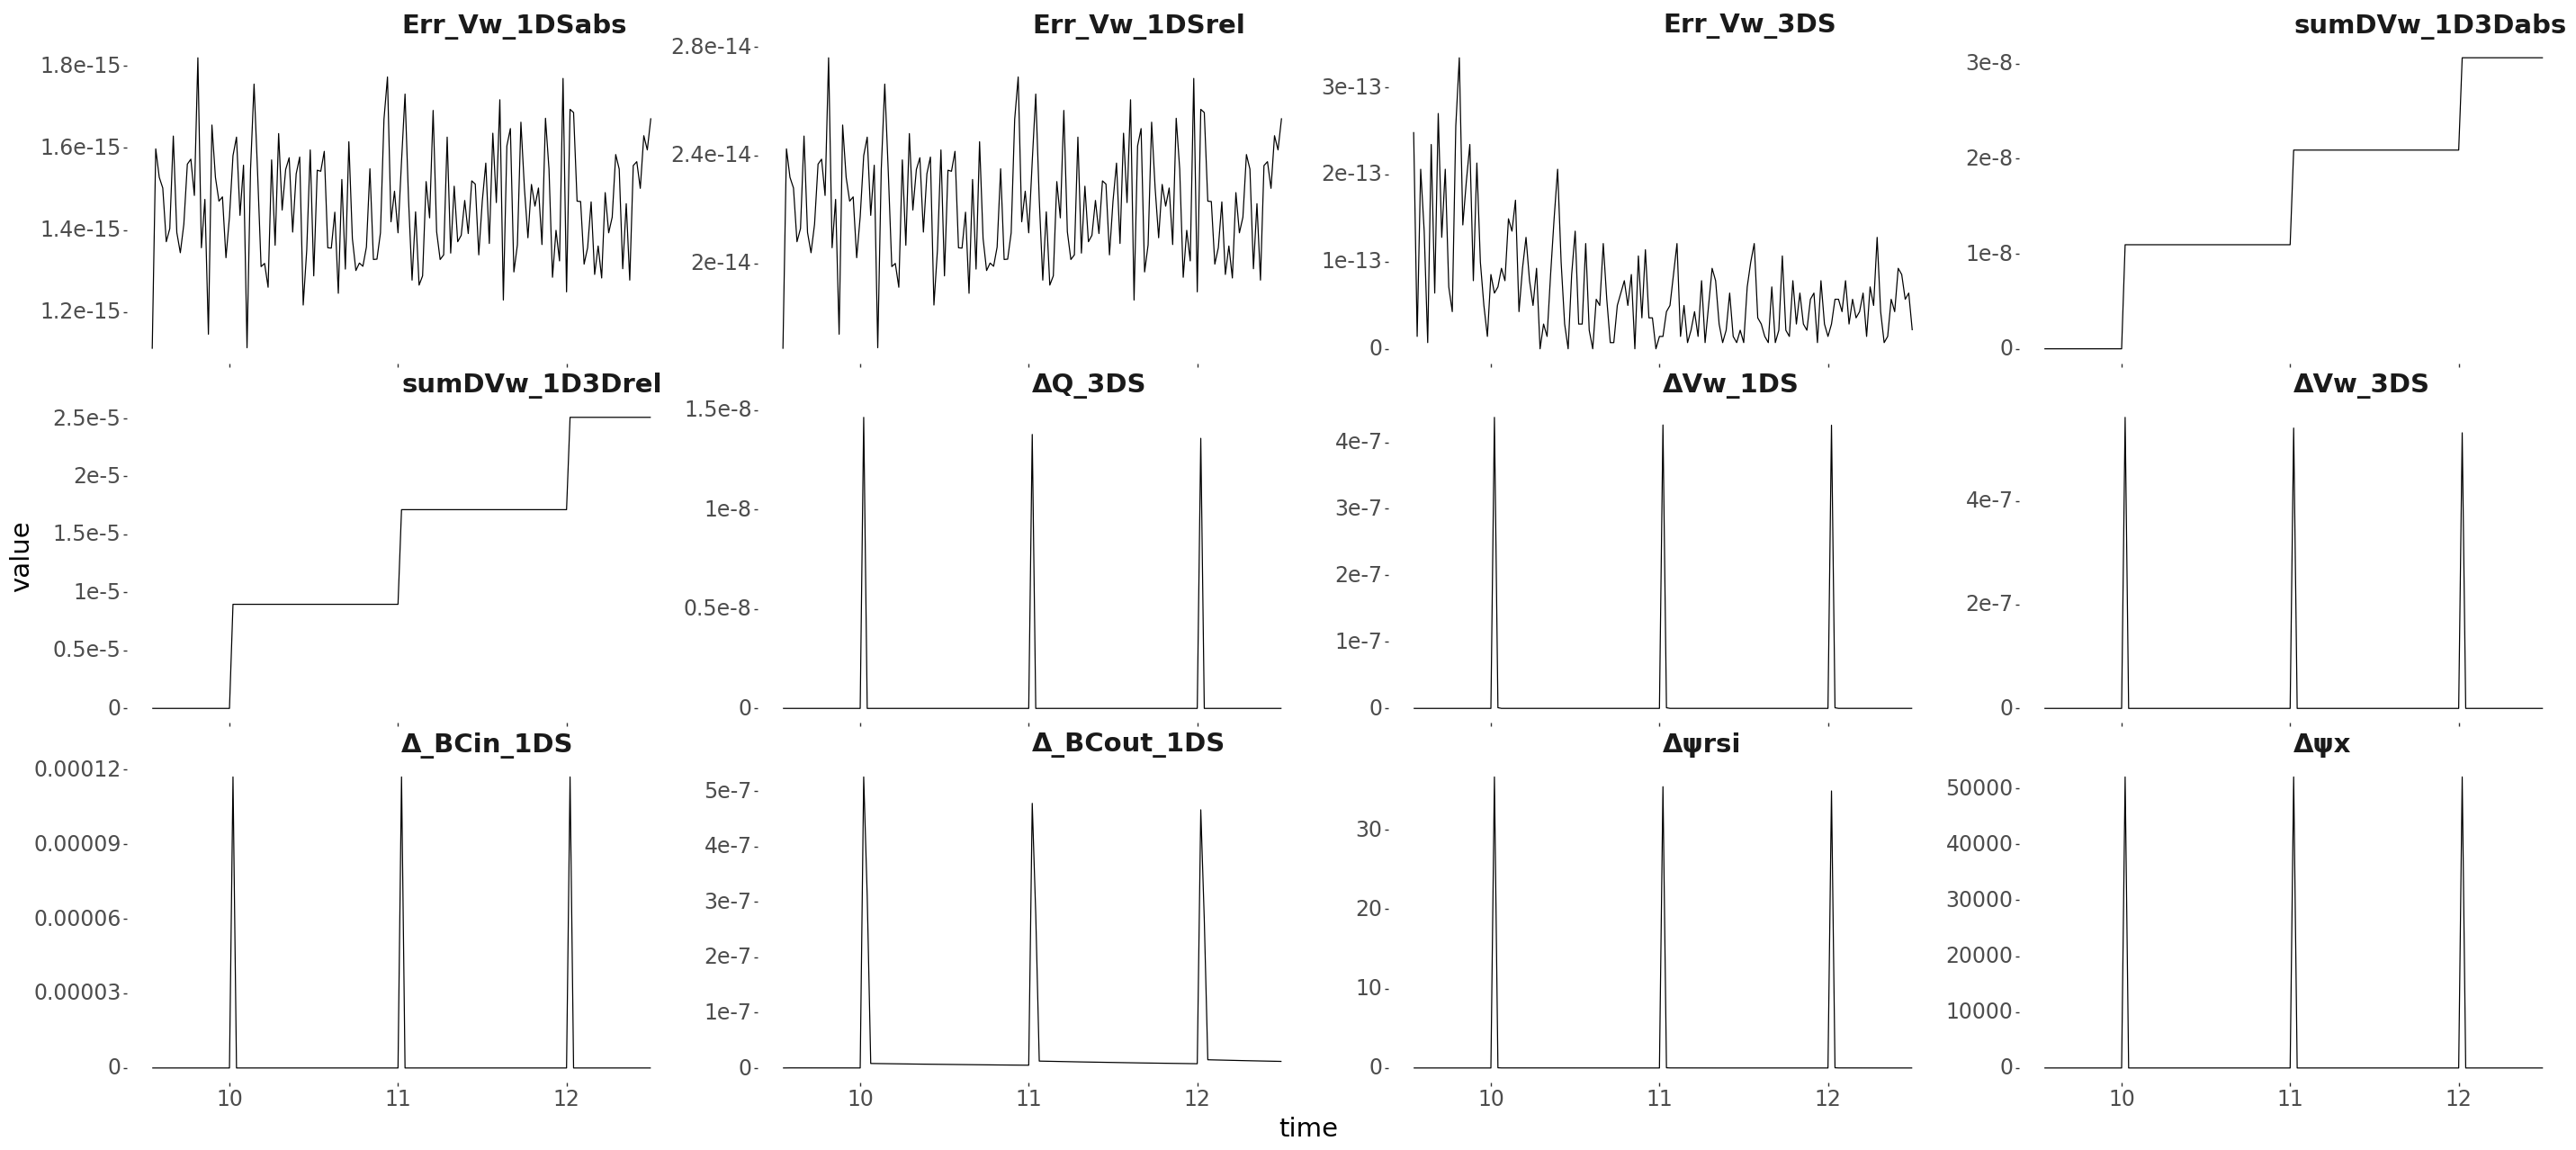

In [5]:
useIter = False

dfs = getValAll(lW95BB, useIter)

if useIter:
    x_val = 'n_loop'
else:
    x_val = 'time'

from plotnine import options
options.figure_size = (35, 15)
fig, plot=(
    ggplot(data=dfs)
    +aes(x=x_val, y='value',col ='variable')+
  xlab(x_val)+
  geom_line()+
  #ylab("s_st (mmol/ml)")+#bquote(s[st]~" (mmol/ml)"))+ 
  facet_wrap("variable",scales = "free")+
  theme(legend_text = element_text( size=15),
        legend_title = element_text( size=15),
        legend_position="none",#c(0.5,0.1),
        legend_direction = "horizontal",
        #legend_box = "vertical",
        panel_grid_minor = element_line(colour="white"),
        panel_grid_major = element_line(colour="white"),
        panel_background = element_rect(fill="white", color="black"),
        strip_text_y =element_text( size=15) ,
        axis_text = element_text( size=17),
        axis_title = element_text( size=21),
        strip_background = element_rect(fill="white"),
        strip_text = element_text(size = 21, hjust = 0,face ="bold"),
        subplots_adjust={'wspace':0.15}
        #strip_placement = "inside"
       )
).draw(show=True, return_ggplot=True)
fig.savefig('lW95_1s.png', dpi=300)

/home/m.giraud/.conda/envs/py38b/lib/python3.8/site-packages/plotnine/facets/facet.py:446: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'
/home/m.giraud/.conda/envs/py38b/lib/python3.8/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 1 rows containing missing values.


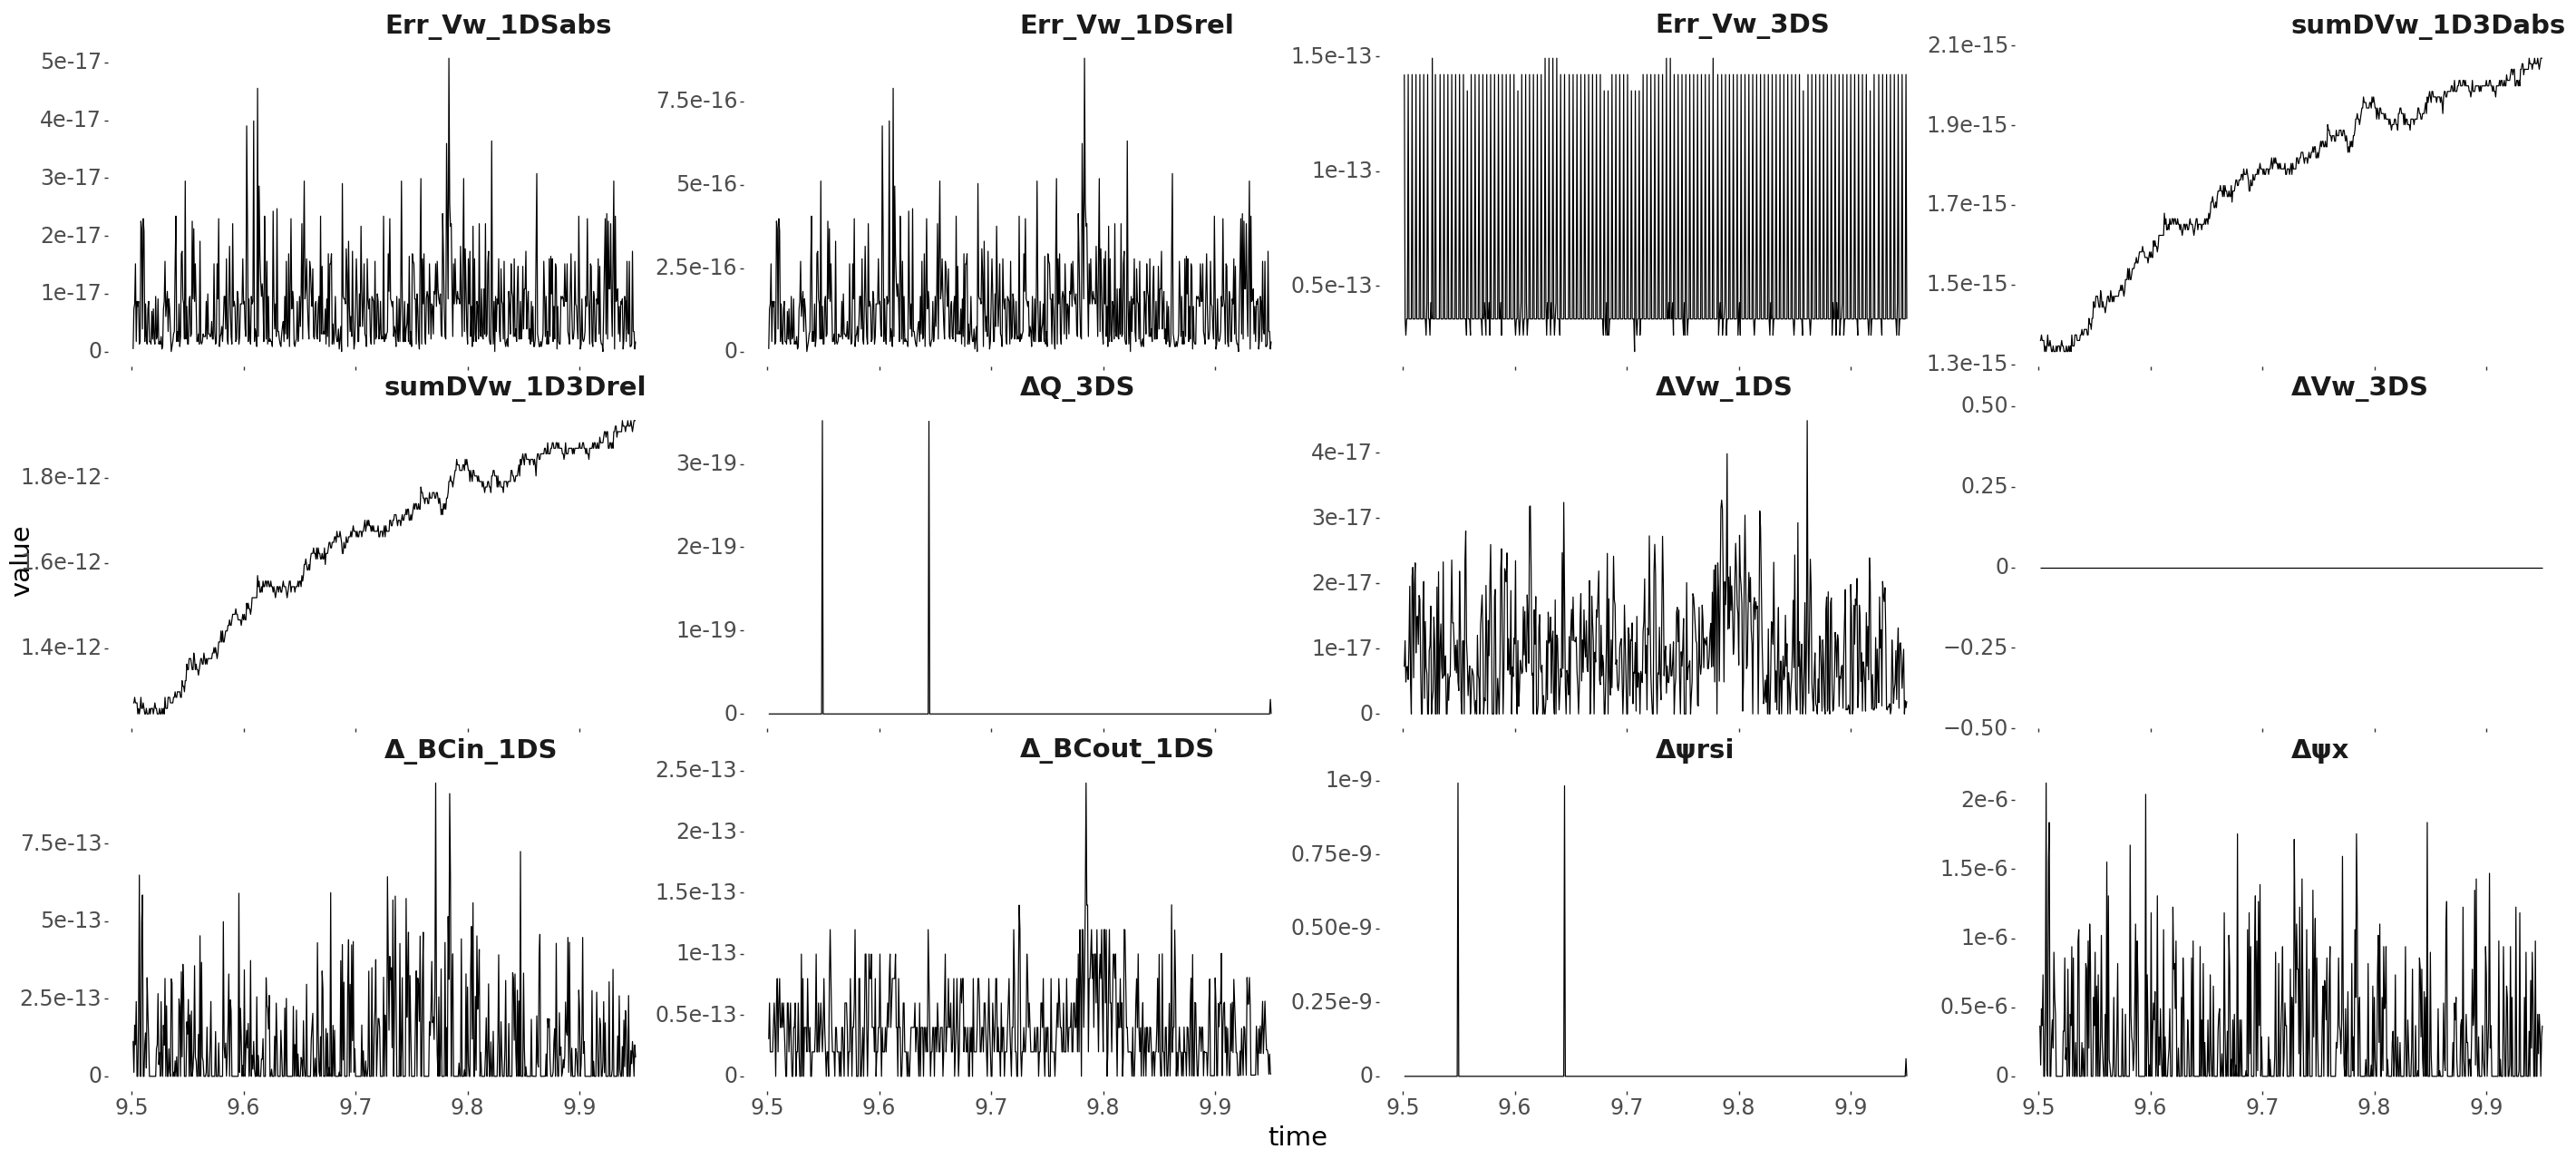

In [6]:
useIter = False

dfs = getValAll(lW95C, useIter)

if useIter:
    x_val = 'n_loop'
else:
    x_val = 'time'

from plotnine import options
options.figure_size = (35, 15)
fig, plot=(
    ggplot(data=dfs)
    +aes(x=x_val, y='value',col ='variable')+
  xlab(x_val)+
  geom_line()+
  #ylab("s_st (mmol/ml)")+#bquote(s[st]~" (mmol/ml)"))+ 
  facet_wrap("variable",scales = "free")+
  theme(legend_text = element_text( size=15),
        legend_title = element_text( size=15),
        legend_position="none",#c(0.5,0.1),
        legend_direction = "horizontal",
        #legend_box = "vertical",
        panel_grid_minor = element_line(colour="white"),
        panel_grid_major = element_line(colour="white"),
        panel_background = element_rect(fill="white", color="black"),
        strip_text_y =element_text( size=15) ,
        axis_text = element_text( size=17),
        axis_title = element_text( size=21),
        strip_background = element_rect(fill="white"),
        strip_text = element_text(size = 21, hjust = 0,face ="bold"),
        subplots_adjust={'wspace':0.15}
        #strip_placement = "inside"
       )
).draw(show=True, return_ggplot=True)
fig.savefig('lW95_30mn_fixedRSI.png', dpi=300)

/home/m.giraud/.conda/envs/py38b/lib/python3.8/site-packages/plotnine/facets/facet.py:446: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'
/home/m.giraud/.conda/envs/py38b/lib/python3.8/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 1 rows containing missing values.


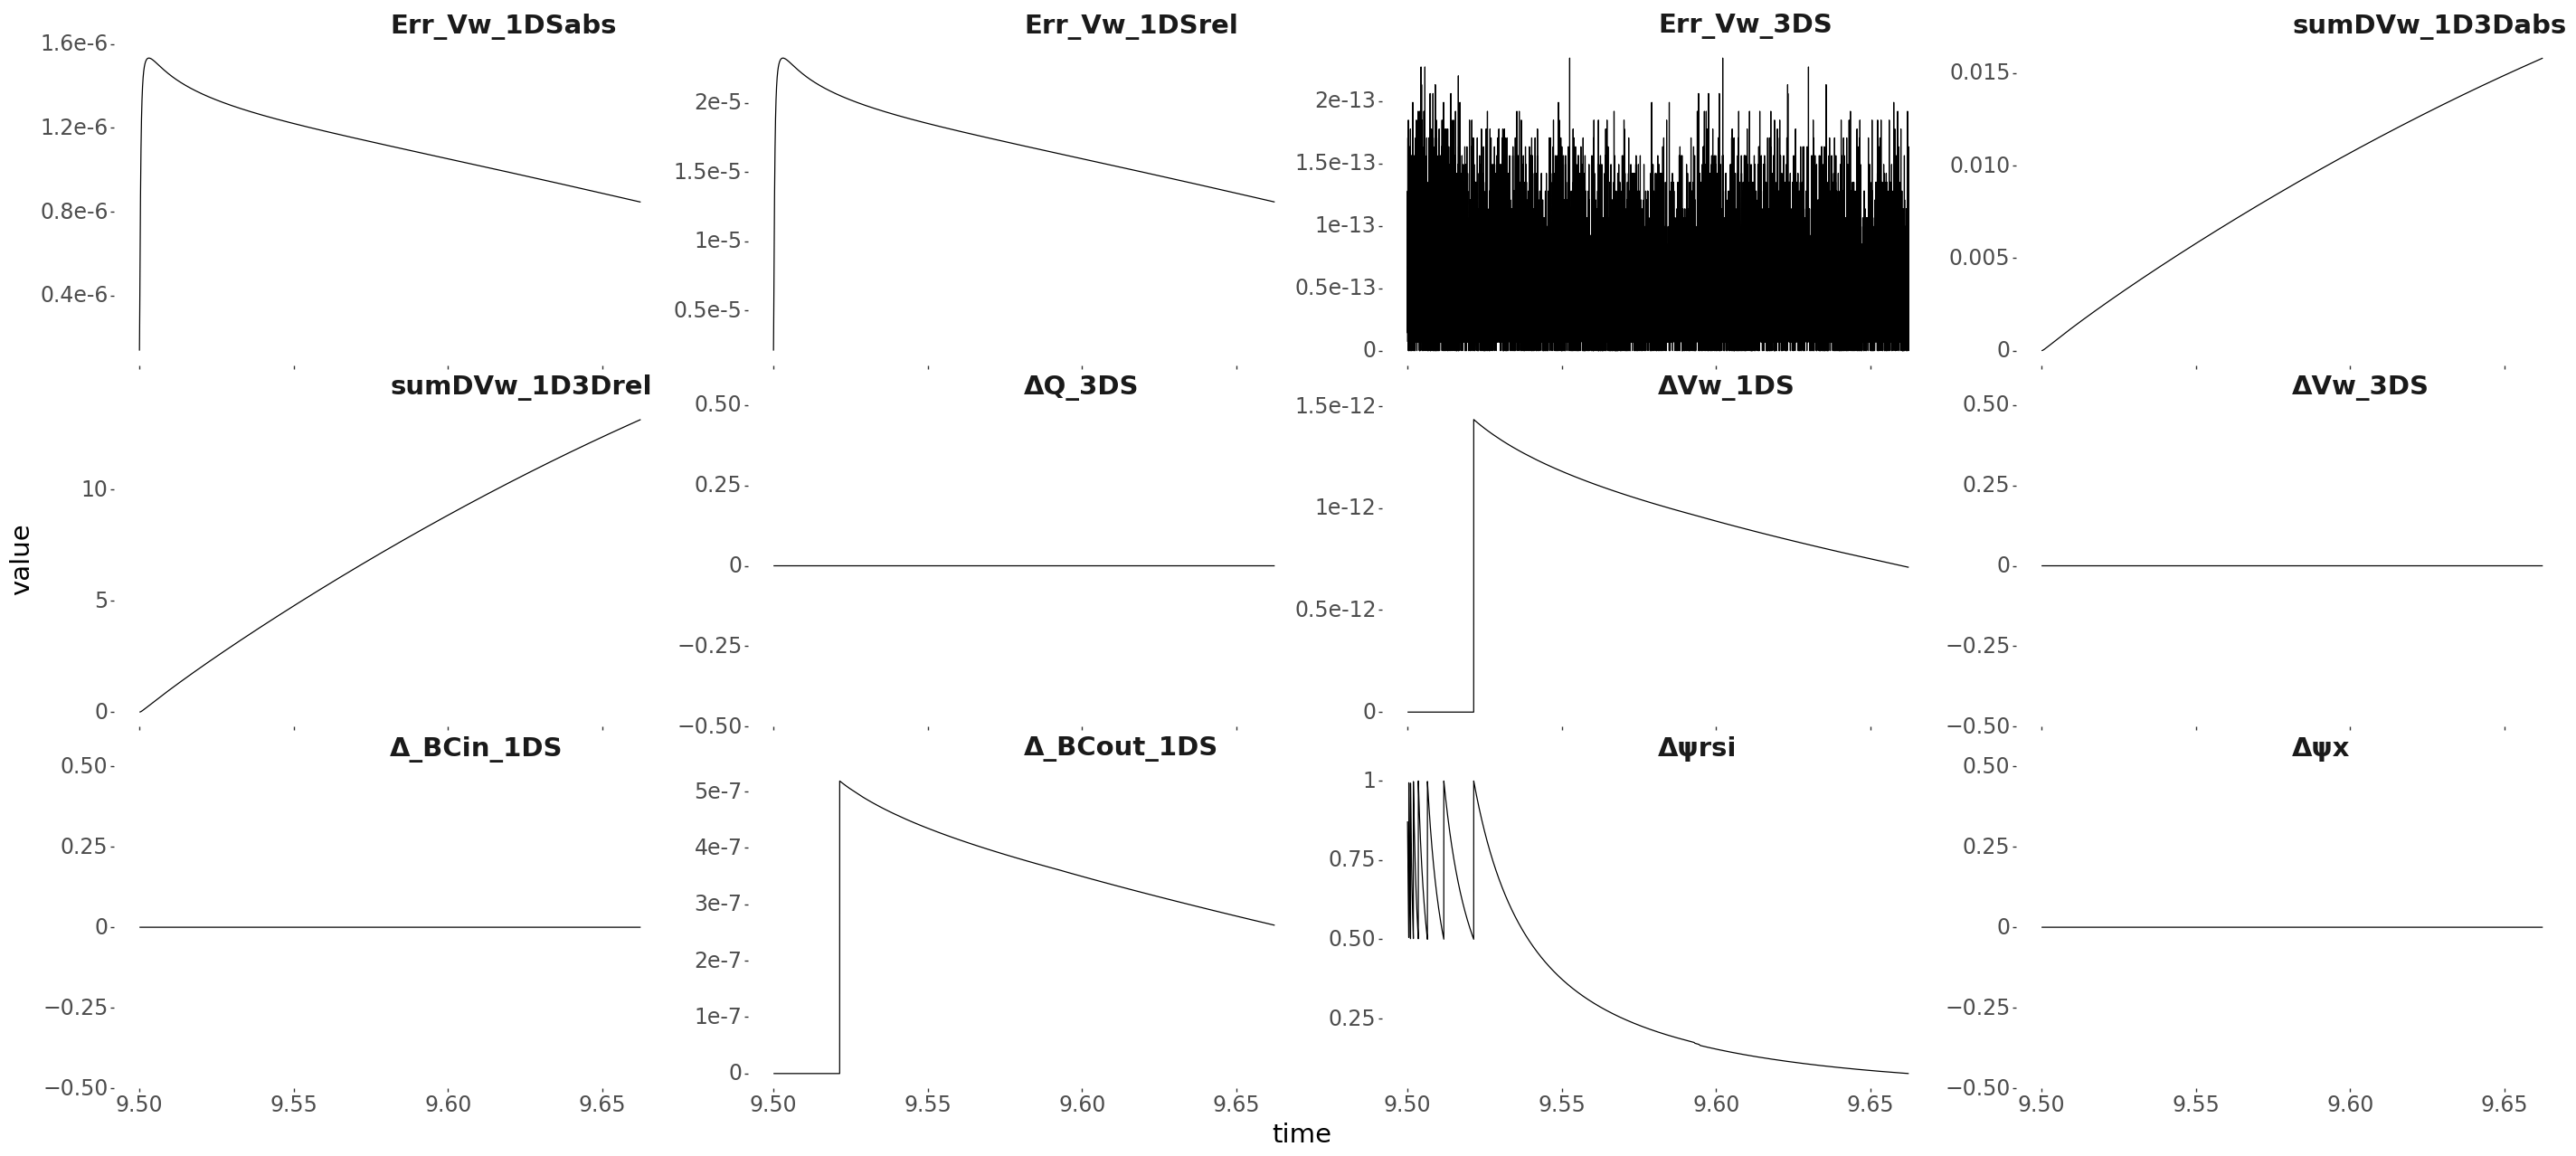

In [132]:
useIter = False

dfs = getValAll(lW95CC, useIter)

if useIter:
    x_val = 'n_loop'
else:
    x_val = 'time'

from plotnine import options
options.figure_size = (35, 15)
fig, plot=(
    ggplot(data=dfs)
    +aes(x=x_val, y='value',col ='variable')+
  xlab(x_val)+
  geom_line()+
  #ylab("s_st (mmol/ml)")+#bquote(s[st]~" (mmol/ml)"))+ 
  facet_wrap("variable",scales = "free")+
  theme(legend_text = element_text( size=15),
        legend_title = element_text( size=15),
        legend_position="none",#c(0.5,0.1),
        legend_direction = "horizontal",
        #legend_box = "vertical",
        panel_grid_minor = element_line(colour="white"),
        panel_grid_major = element_line(colour="white"),
        panel_background = element_rect(fill="white", color="black"),
        strip_text_y =element_text( size=15) ,
        axis_text = element_text( size=17),
        axis_title = element_text( size=21),
        strip_background = element_rect(fill="white"),
        strip_text = element_text(size = 21, hjust = 0,face ="bold"),
        subplots_adjust={'wspace':0.15}
        #strip_placement = "inside"
       )
).draw(show=True, return_ggplot=True)
fig.savefig('lW95_1s_fixedRSI.png', dpi=300)